## Predicting Phone Weight from Size

#### Goal: Hypothesize a relationship between phone specs and compare to the true value

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [12]:
data = pd.read_csv('CellphoneSpecs.csv')
df = pd.DataFrame(data)
df

,Phone,Size(in),Display,Talk_time(min),Resolution,Storage(GB),Weight(g),Battery_Capacity(mAh),Standby(days),Battery,Memory(MB),Facebook,GPS
0,1,3.2,TFT,690,360x640,16.000,122,1320,18,Lithium-ion battery,128,Yes,Yes
1,2,2.4,TFT,330,480x360,0.512,99,1000,15,Lithium-ion battery,512,Yes,Yes
2,3,3.7,S-LCD,410,480x800,4.000,135,1600,17,Lithium-ion battery,768,not available,Yes
3,4,2.4,TFT,330,240x320,0.060,132,900,13,Lithium-ion battery,128,not available,no
4,5,4.5,Super AMOLED,420,480x800,16.000,132,1850,10,Lithium-ion battery,1024,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,75,3.5,IPS LCD,480,320x480,4.000,140,1500,8,Lithium-ion battery,512,not available,Yes
75,76,3.2,TFT,450,480x800,0.100,158,1500,21,Lithium-ion battery,256,Yes,Yes
76,77,NaN,TFT,240,240x320,0.256,191,1440,8,Lithium-ion battery,64,not available,Yes
77,78,2.0,TFT,420,176x220,0.006,94,800,19,Lithium-ion battery,16,not available,no


Text(0.5, 1.0, 'Correlation between Size and Weight')

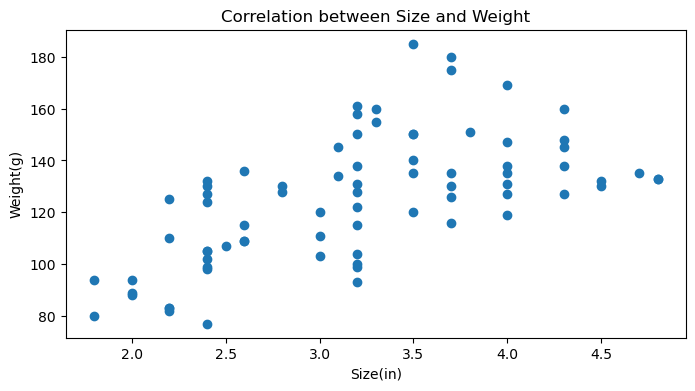

In [115]:
fig, ax = plt.subplots(figsize = (8,4))

ax.scatter(df['Size(in)'],df['Weight(g)'])
ax.set_xlabel('Size(in)')
ax.set_ylabel('Weight(g)')
ax.set_title('Correlation between Size and Weight')

#### Hypothesis
- Looking at the scatter plot comparing Size and Weight of a phone, it is evident that these two values are correlated. I believe they have a positive relationship where every increase in phone size results in an increase in the phones weight.

- NAs dropped as it was causing issues when trying to calculate regression line
- Also needed to hypothesize line in Rossman/Chance Applet Collection

In [89]:
filtered = df.dropna()
filterSW = filtered[['Size(in)','Weight(g)']]
filteredData = filterSW.to_csv('filter.csv', index = False)

### Hypothesized Line
- Weight(g)^ = 31.60 + 29.96 x Size(in)
- Sum Squared Errors (SSE) = 33723.84
- Std Dev Residuals = 21.20

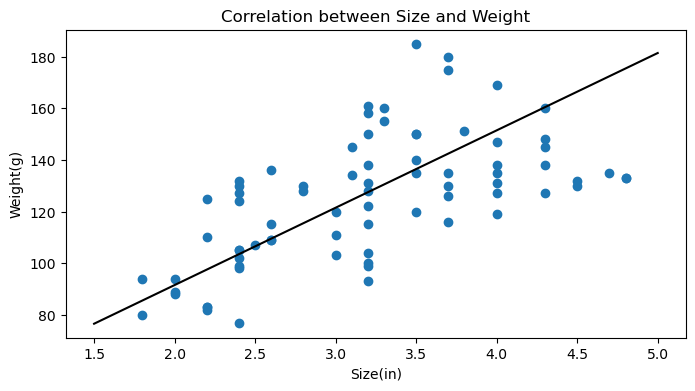

In [117]:
fig, ax = plt.subplots(figsize = (8,4))
m1, b1 = 29.96, 31.60

x1 = np.arange(1.5,5.5,0.5)
yhat1 = m1*x1+b1

ax.scatter(df['Size(in)'],df['Weight(g)'])
ax.set_xlabel('Size(in)')
ax.set_ylabel('Weight(g)')
ax.set_title('Correlation between Size and Weight')
ax.plot(x1, yhat1, color = 'black')

In [73]:
model = linregress(filtered['Size(in)'], filtered['Weight(g)'])
m, b = model.slope, model.intercept

x = np.arange(1.5,5.5,0.5)
yhat = m*x+b

Sum Squared Errors 28053.13482780746
Weight(g) = 19.15 x Size(in) + 64.11
P-value: 4.3628943272677625e-09


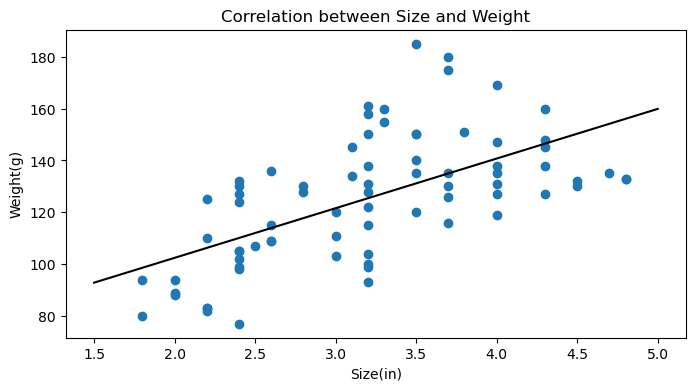

In [116]:
fig, ax = plt.subplots(figsize = (8,4))

ax.scatter(filtered['Size(in)'], filtered['Weight(g)'])
ax.plot(x, yhat, color = 'black')
ax.set_xlabel('Size(in)')
ax.set_ylabel('Weight(g)')
ax.set_title('Correlation between Size and Weight')
print('Sum Squared Errors', np.sum((df['Weight(g)']- (m*df['Size(in)'] + b))**2))
print(f'Weight(g) = {round(m,2)} x Size(in) + {round(b,2)}')
print(f'P-value: {model.pvalue}')

### True Regression Line (From Rossman/Chance Applet Collection)
- Weight(g)^ = 64.11 + 19.15 × Size(in)
- Sum Squared Errors (SSE) = 28053.13
- Std Dev Residuals = 19.34

Conclusion: Comparing my hypothesis to the true value, I was very far off. The true regression has a larger slope and intercept value and a significantly smaller SSE. Furthermore, the true regression line displays a strong relationship between the size of phone and its weight. This is supported by a very small p-value (< 0.05). In other words, for every increase in size, the weight increases as well. 